## 3.1 Problem-*1*
1. Data Exploration and Understanding:
#   • Dataset Overview:
 a. Load the dataset and display the first 10 rows.

 b. Identify the number of rows and columns in the dataset.

 c. List all the columns and their data types.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#a
File_p=("/content/drive/MyDrive/DataSet/WHR-2024-5CS037.csv")
df=pd.read_csv(File_p)
print("First 10 rows, \n0 is adressed as 1 and 9 as 10:")
print(df.head(10))

First 10 rows, 
0 is adressed as 1 and 9 as 10:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0

In [3]:
#b
print("Number of rows and columns are:")
print(f"1.Rows:{df.shape[0]} \n2.Columns:{df.shape[1]}")

Number of rows and columns are:
1.Rows:143 
2.Columns:9


In [19]:
#c
print("Columns and their data types:")
print(df.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**Basic Statistics**
# Basic Statistics
a. Calculate the mean, median, and standard deviation for the Score column.

b. Identify the country with the highest and lowest happiness scores.

In [29]:
#a
Mean_v=df['score'].mean()
Median_v=df['score'].median()
Std_Dev_v=df['score'].std()

print("The statistics for the score column:")
print(f"Mean:{Mean_v}")#first Mean is variable to put the mean value by acccessing from up
print(f"Median:{Median_v}")
print(f"Standard Deviation:{Std_Dev_v}")


The statistics for the score column:
Mean:5.52758041958042
Median:5.785
Standard Deviation:1.1707165099442995


In [33]:
#b
Highest_Country_sc=df.loc[df["score"].idxmax(),'Country name']
Lowest_Country_sc=df.loc[df["score"].idxmin(),'Country name']

print(f"Country with the highest happiness score is :{Highest_Country_sc}")
print(f"Country with lowest happiness score is :{Lowest_Country_sc}")


Country with the highest happiness score is :Finland
Country with lowest happiness score is :Afghanistan


# Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [38]:
print("Checking the missing values in the dataset:")
Missing_values=df.isnull().sum()

print(Missing_values)

Checking the missing values in the dataset:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


# • Filtering and Sorting:
a. Filter the dataset to show only the countries with a Score greater than 7.5.

b. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [39]:

#a
Filtered_df=df[df['score']>7.5]
print(Filtered_df)



  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [42]:
#b
Sorted_df=Filtered_df.sort_values(by='Log GDP per capita',ascending=False)
print("Below are the countries filtered and sorted by  GDP per Capita in descending order:")
print(Sorted_df.head(10))

Below are the top 10 countries  sorted by  GDP per Capita in descending order:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


# Adding New Columns:
a. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [55]:
#a.
def happiness_cat(score):
 if score < 4:
  return"Low"
 elif 4<= score <=6:
  return "Medium"
 else:
  return "High"

df['Happiness category'] = df['score'].apply(happiness_cat)
print("Dataset of Happiness Category:")
print(df[['Country name','score','Happiness category']].head())

Dataset of Happiness Category:
  Country name  score Happiness category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


# 2. Data Visualizations
a. Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

b. Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

c. Plot a histogram for the Score column to show its distribution and also
   interpret.

d. Scatter Plot: Plot a scatter plot between GDP per Capita and Score to
  visualize their
  
 relationship.

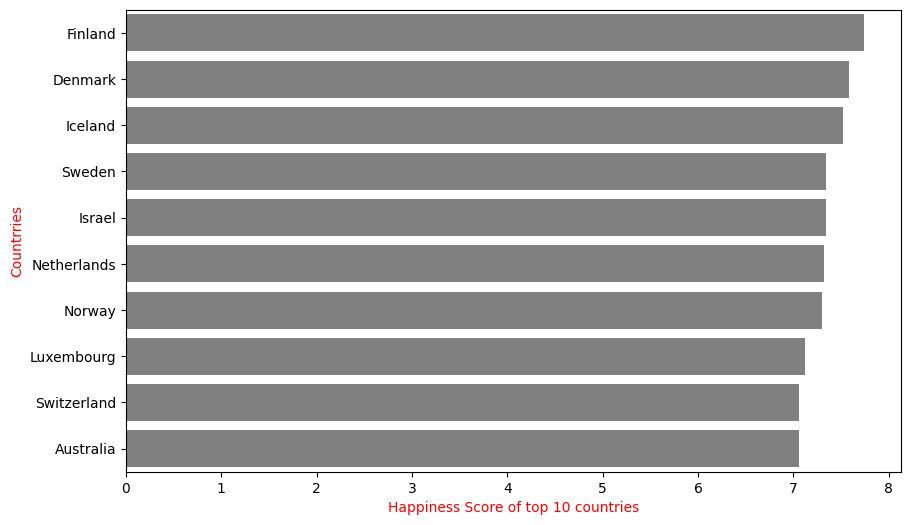

In [71]:
#a
Happiest_top10_country= df.sort_values(by='score',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='score',y='Country name',data=Happiest_top10_country,color='grey')
plt.xlabel("Happiness Score of top 10 countries",color="red")
plt.ylabel('Countrries',color='red')
plt.show()

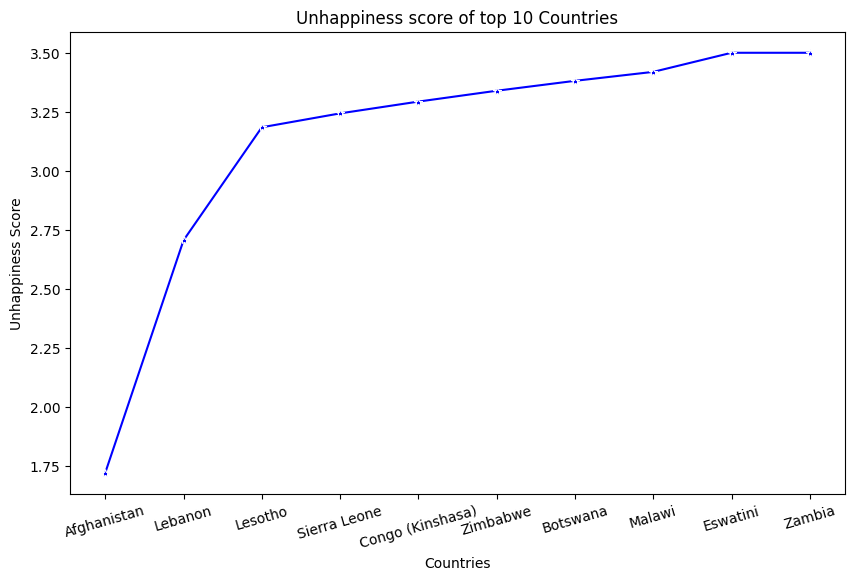

In [99]:
#b
Unhappiest_top10_country=df.sort_values(by='score',ascending=True).head(10)
plt.figure(figsize=(10,6))
sns.lineplot(x='Country name',y='score',data=Unhappiest_top10_country,marker='*',color='blue')
plt.title("Unhappiness score of top 10 Countries")
plt.xlabel('Countries')
plt.ylabel("Unhappiness Score")
plt.xticks(rotation=16)#to help the country name size fit properly to avoid overlap
plt.show()


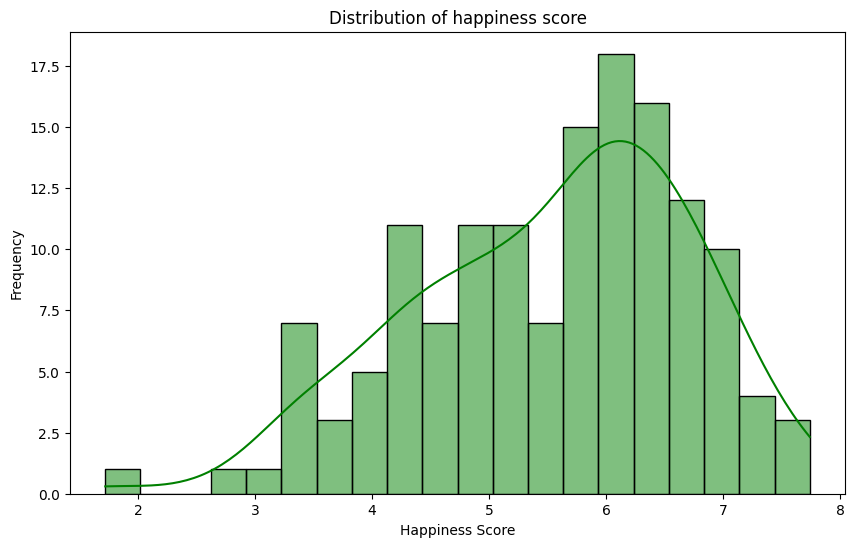

In [93]:
#c
plt.figure(figsize=(10,6))
sns.histplot(df['score'],bins=20,kde=True,color='green')
plt.title('Distribution of happiness score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

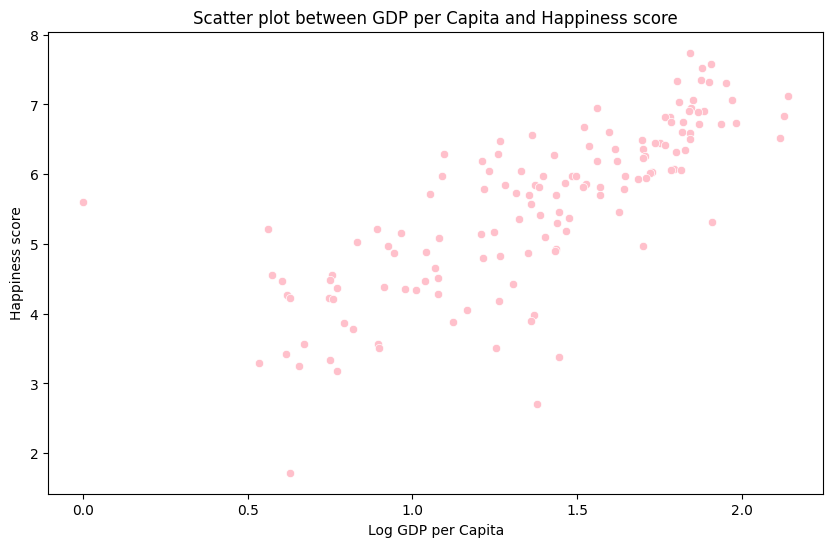

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Log GDP per capita',y='score',data=df,color="pink")
plt.title('Scatter plot between GDP per Capita and Happiness score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness score')
plt.show()


# 3.2 Problem - 2
# Some Advance Data Exploration Task

a. Define the countries in South Asia with a list for example: south asian
   countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
  "Maldives", "Nepal", "Pakistan", "Srilanka"]

b. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
c. Save the filtered dataframe as separate CSV files for future use.

In [4]:
#a
south_asian_count=["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asian_df=df[df['Country name'].isin(south_asian_count)]
#saving it to CSV file
south_asian_df.to_csv('south_asian_happiness_data.csv',index=False)
print(south_asian_df.head())

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

# Task - 2
# Composite Score Ranking

a. Using the SouthAsia DataFrame, create a new column called Composite Score
  that combines the
  following metrics:



>
**Composite Score** = 0.40 × GDP per Capita + 0.30 × Social Support+ 0.30 × Healthy Life Expectancy





b. Rank the South Asian countries based on the Composite Score in descending
 order.

c. Visualize the top 5 countries using a horizontal bar chart showing the
  Composite Score.

d. Discuss whether the rankings based on the Composite Score align with the
   original Score - support your
  discussion with some visualization plot.

<ipython-input-12-ca3fbdd13aea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_df['Composite Score'] = (


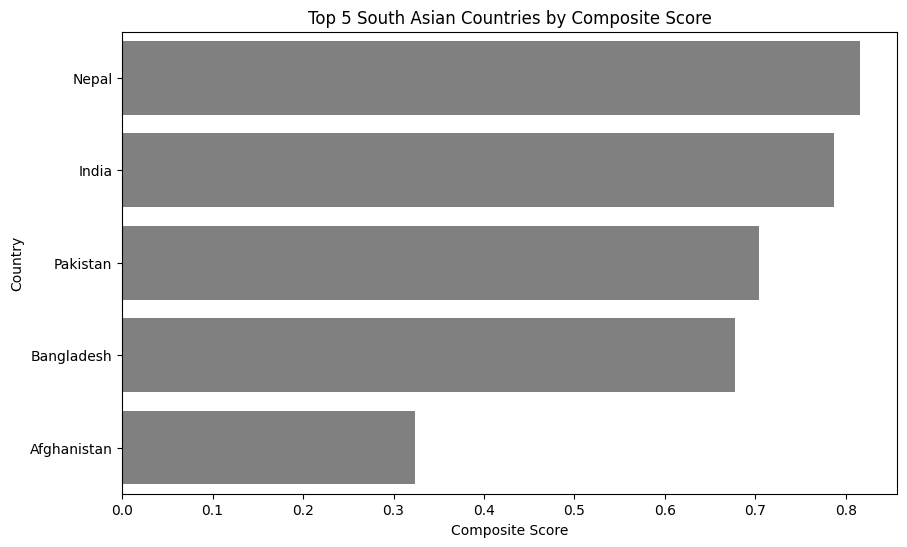

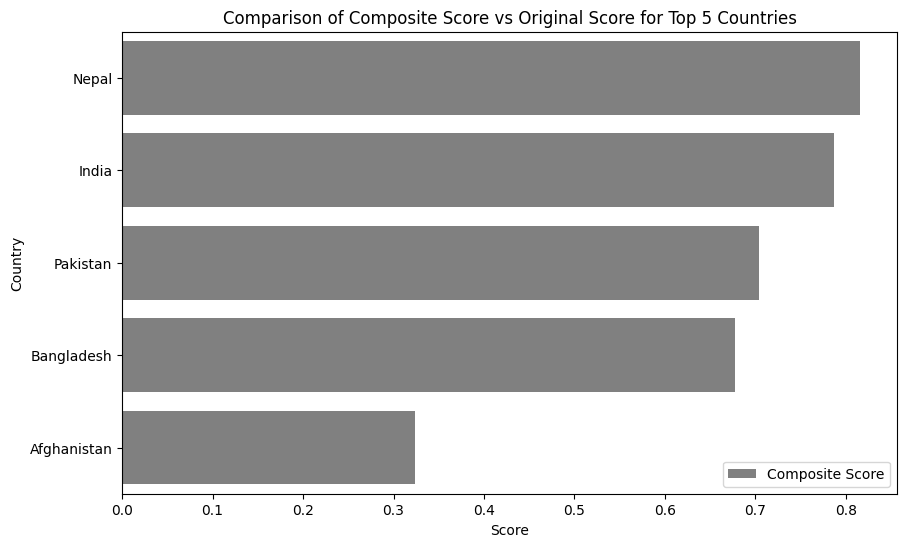

In [12]:
#a.
#Composite Score=0.48*GDP per Capita + 0.30*Healthy Life Expectancy
# Composite Score Calculation
south_asian_df['Composite Score'] = (
    0.40 * south_asian_df['Log GDP per capita'] +
    0.30 * south_asian_df['Social support'] +
    0.30 * south_asian_df['Healthy life expectancy']
)
#b.
south_asian_df = south_asian_df.sort_values(by='Composite Score', ascending=False)
#c.
top_5_composite_score = south_asian_df.head(5)


plt.figure(figsize=(10,6))
sns.barplot(x='Composite Score',y='Country name',data=top_5_composite_score, color='grey')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()
#d.
plt.figure(figsize=(10,6))
sns.barplot(x='Composite Score',y='Country name',data=top_5_composite_score,color='grey',label='Composite Score')
plt.title('Comparison of Composite Score vs Original Score for Top 5 Countries')
plt.xlabel('Score')
plt.ylabel('Country')
#legend is a small box, usually placed within the plot area
plt.legend()
plt.show()

# Task - 3
# Outlier Detection

a. Identify outlier countries in South Asia based on their Score and GDP per Capita.

b. Define outliers using the 1.5 × IQR rule.

c. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

d. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [14]:
#a.
Q1_sc=south_asian_df['score'].quantile(0.25)
Q3_sc=south_asian_df['score'].quantile(0.75)
IQR_score=Q3_sc-Q1_sc #Interquartile range , it describes the spread of variabiity of a dataset

Q1_gdp=south_asian_df['Log GDP per capita'].quantile(0.25)
Q3_gdp=south_asian_df['Log GDP per capita'].quantile(0.75)
IQR_gdp=Q3_gdp-Q1_gdp

In [20]:
#b.
#defining outliers
score_outliers = south_asian_df[(south_asian_df['score'] < (Q1_sc - 1.5 * IQR_score)) |
                                (south_asian_df['score'] > (Q3_sc + 1.5 * IQR_score))]

gdp_outliers = south_asian_df[(south_asian_df['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) |
                               (south_asian_df['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))]
outliers=pd.concat([score_outliers,gdp_outliers]).drop_duplicates()


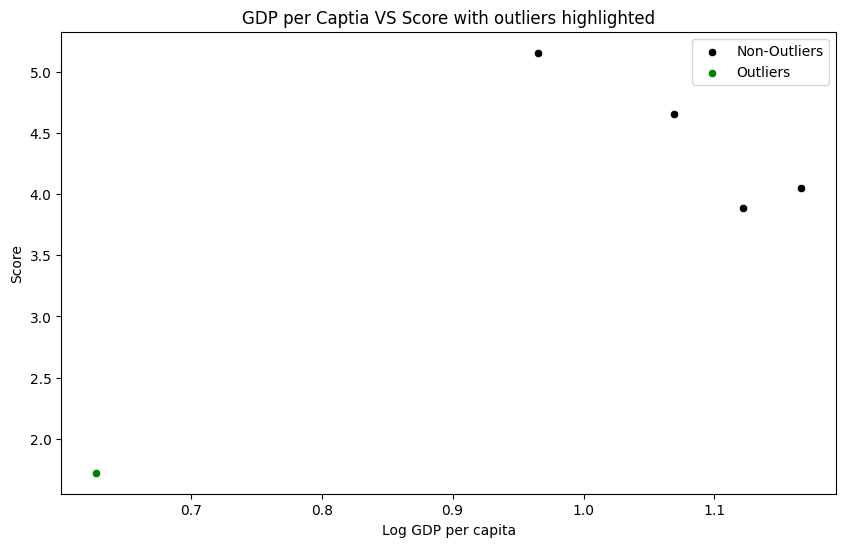

In [26]:
#c.
#Creating a scatter plot with GDP per Capita
plt.figure(figsize=(10,6))
sns.scatterplot(x='Log GDP per capita',y='score',data=south_asian_df,color='black',label='Non-Outliers')

sns.scatterplot(x='Log GDP per capita',y='score',data=outliers, color='green',label='Outliers')
plt.title('GDP per Captia VS Score with outliers highlighted')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.show()

d.

The **characteristics** of these outliers and their **potential impact** on reginal averages:

1.There is high or low in log GDP per Capita values.

2.There are unusual scores .

3.There are unique factores which might be influenced by geography,politics or resource dependency.

Impacts:

1.High outliers can increase regional averages, while low  outliers can decrease them down.

2.The policy makers might make incorrect decision based on altered averages.

3.Outliers can make the relationship between GDP and happiness score high or low accordingly.

# Task - 4
# Exploring Trends Across Metrics

a. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

b. Create scatter plots with trendlines for these metrics against the Score.

c. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [27]:
#a.
freedom_corrreln=south_asian_df['Freedom to make life choices'].corr(south_asian_df['score'])
generosity_corrreln = south_asian_df['Generosity'].corr(south_asian_df['score'])

print(f"Pearson correlation between Freedom to Make Life Choices and Score: {freedom_corrreln}")
print(f"Pearson correlation between Generosity and Score: {generosity_corrreln}")

Pearson correlation between Freedom to Make Life Choices and Score: 0.801497903141921
Pearson correlation between Generosity and Score: 0.8773326267276359


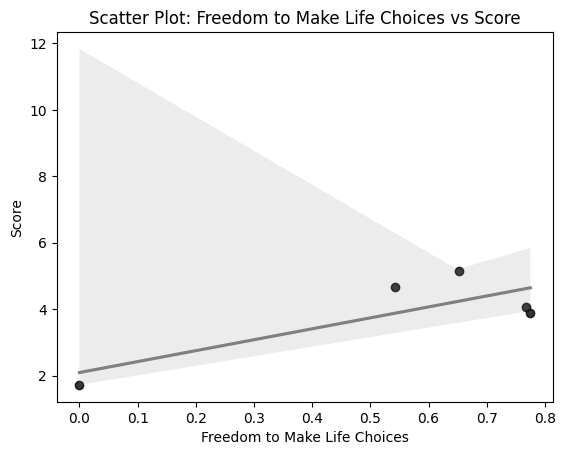

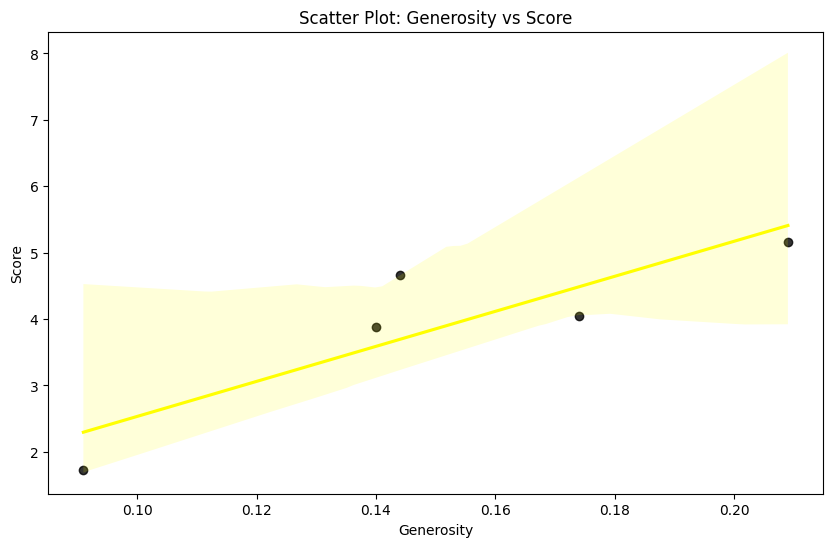

In [30]:
#b.
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_df, scatter_kws={'color':'black'}, line_kws={'color':'grey'})
plt.title('Scatter Plot: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()



plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_df, scatter_kws={'color':'black'}, line_kws={'color':'yellow'})
plt.title('Scatter Plot: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

**First graph:**
*(Freedom to make life choices vs Score)*
The regression line shows a positive slope, if Freedom to make life increases score also ncreases.
The relationship appears relatively weak, as the data points are scattered with low density near the line.

**Second graph:**
*(Generosity vs Score)*
It shows positive slope in the regression line.
There is a strong relationship as the data points around the line are tight.

# Task - 5
Gap Analysis

a. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

b. Rank the South Asian countries by this gap in both ascending and descending order.

c. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

d. Analyze the reasons behind these gaps and their implications for South Asian countries.

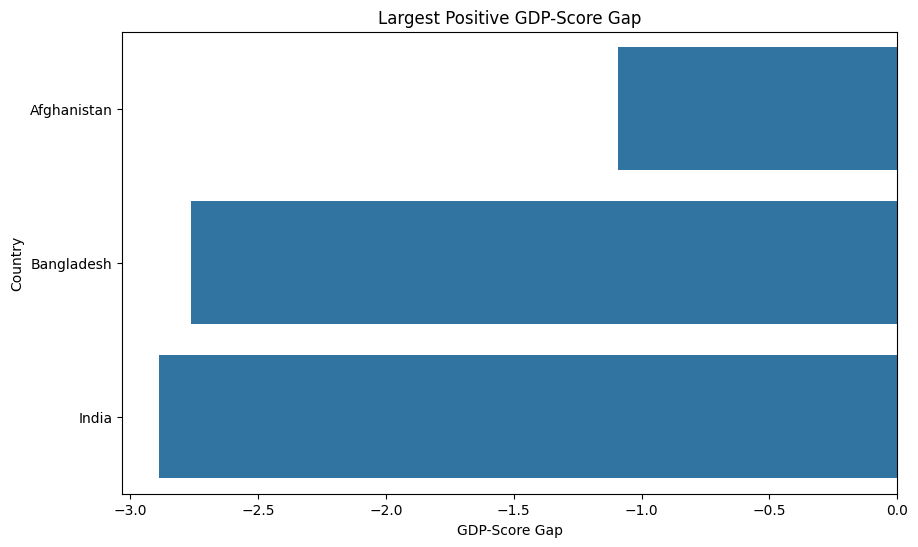

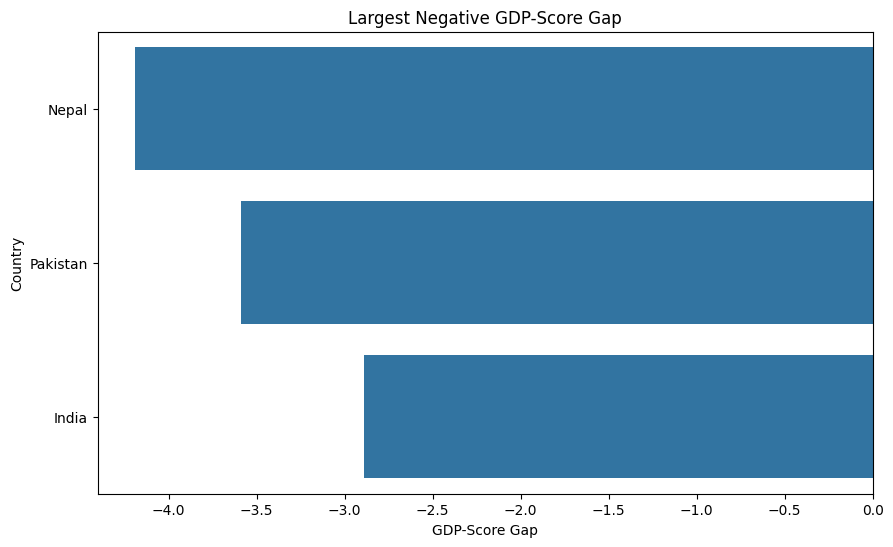

In [34]:
#a
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']
#b
ascending_gap = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=True)

#descending order
descending_gap = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=False)

#c
top_3_positive_gap = descending_gap.head(3)
top_3_negative_gap = ascending_gap.head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive_gap)
plt.title('Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_negative_gap)
plt.title('Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()


# 3.3 Problem - 3
# Comparative Analysis

Task - 1

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]


# Complete the following task:

a. **Descriptive Statistics:**
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

b. **Top and Bottom Performers:**
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

c. **Metric Comparisons:**
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

d.** Happiness Disparity:**
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

e.** Correlation Analysis:**
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

f. **Outlier Detection:**
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

g. **Visualization:**
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

In [35]:
#Task1-1

middle_e_count = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east_df = df[df['Country name'].isin(middle_e_count)]

middle_east_df.to_csv("middle_east_data.csv", index=False)

print(middle_east_df.head())

            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual  
4                       0.193                2.298  
12                      0.17

In [36]:
#a.
south_asia_m = south_asian_df['score'].mean()
south_asia_std = south_asian_df['score'].std()

middle_east_m = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean: {south_asia_m}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean: {middle_east_m}, Standard Deviation: {middle_east_std}")

# • Which region has higher happiness Scores on average?
if south_asia_m > middle_east_m:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean: 3.8952, Standard Deviation: 1.3160025455902433
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has a higher average happiness score.


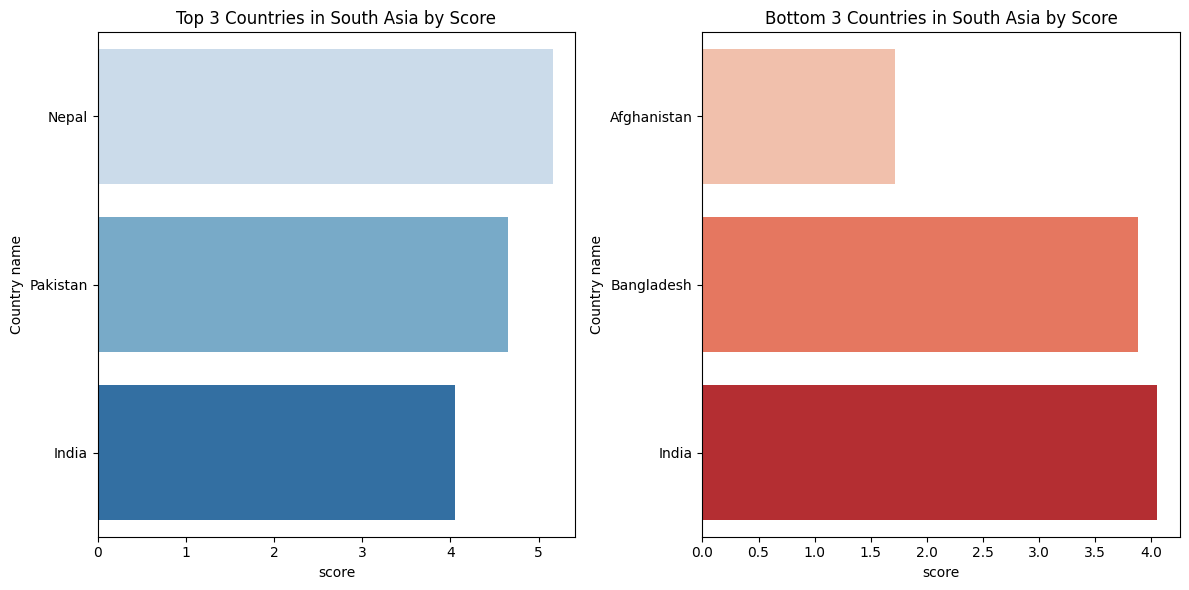

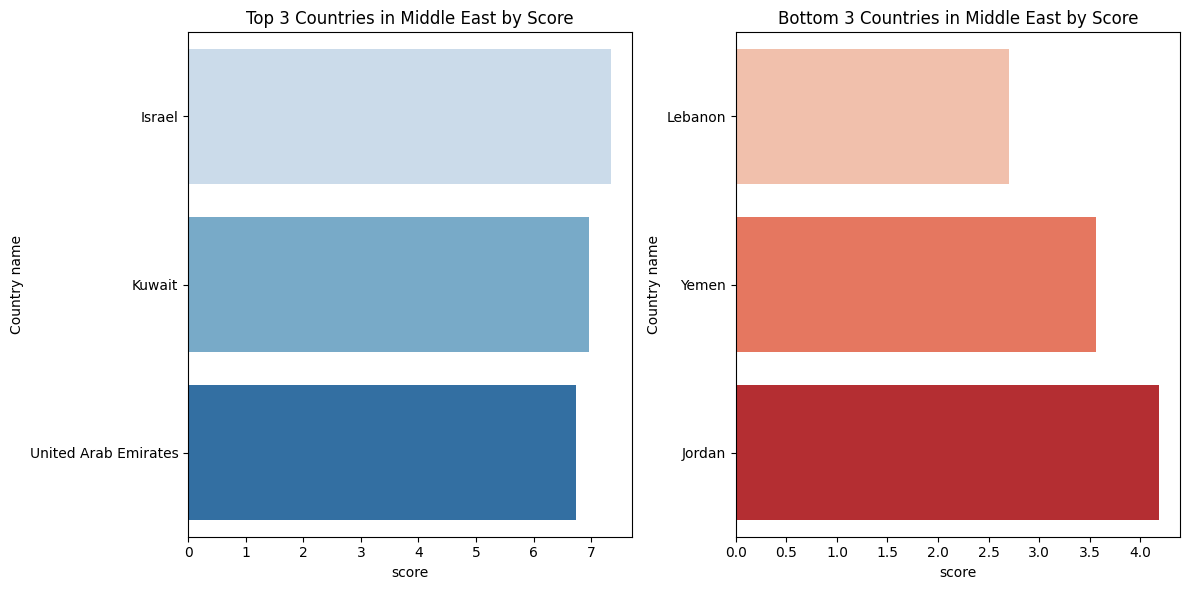

In [45]:
#b.
south_asia_top_3 = south_asian_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
south_asia_bottom_3 = south_asian_df[['Country name', 'score']].sort_values(by='score').head(3)

middle_east_top_3 = middle_east_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
middle_east_bottom_3 = middle_east_df[['Country name', 'score']].sort_values(by='score').head(3)

# barcharts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=south_asia_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in South Asia by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=south_asia_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in South Asia by Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=middle_east_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in Middle East by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=middle_east_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in Middle East by Score')

plt.tight_layout()
plt.show()

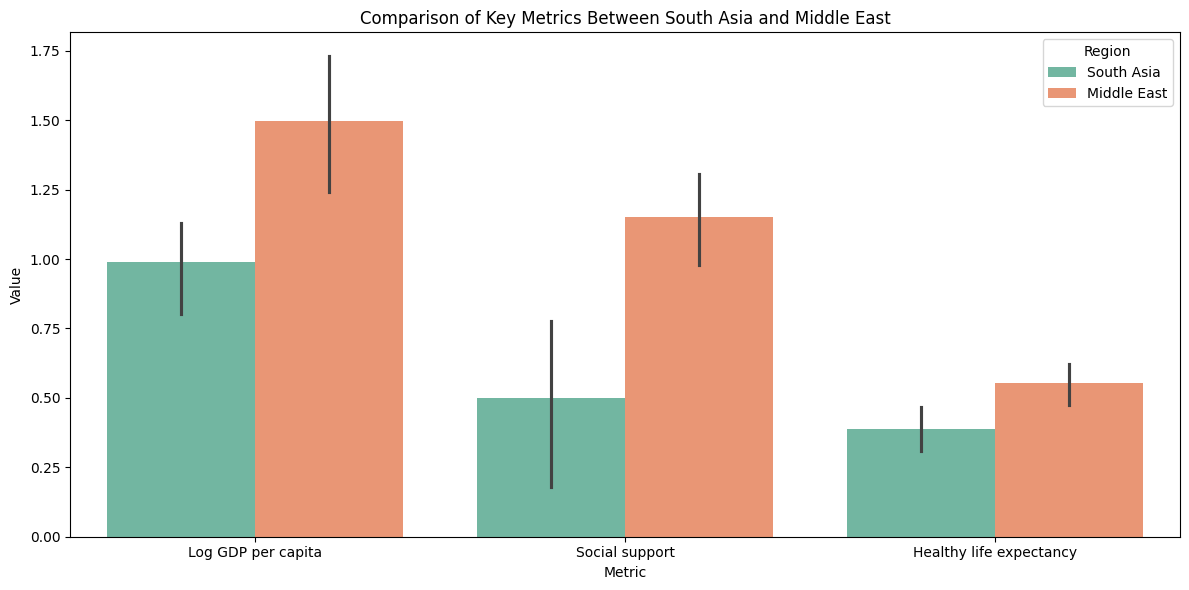

In [46]:
#c.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_metrics = south_asian_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')
middle_east_metrics = middle_east_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')

south_asia_metrics['Region'] = 'South Asia'
middle_east_metrics['Region'] = 'Middle East'

comparison_df = pd.concat([south_asia_metrics, middle_east_metrics]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_df, palette='Set2')

plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [47]:
#d.

south_asia_score_range = south_asian_df['score'].max() - south_asian_df['score'].min()
middle_east_score_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = south_asian_df['score'].std() / south_asian_df['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia Score Range: {south_asia_score_range}")
print(f"Middle East Score Range: {middle_east_score_range}")
print(f"South Asia Coefficient of Variation (CV): {south_asia_cv}")
print(f"Middle East Coefficient of Variation (CV): {middle_east_cv}")

South Asia Score Range: 3.4370000000000003
Middle East Score Range: 4.634
South Asia Coefficient of Variation (CV): 0.33785236845097644
Middle East Coefficient of Variation (CV): 0.28938880812119405


South Asia Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.801498   
Freedom to make life choices  0.801498                      1.000000   
Generosity                    0.877333                      0.740660   

                              Generosity  
score                           0.877333  
Freedom to make life choices    0.740660  
Generosity                      1.000000  

Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


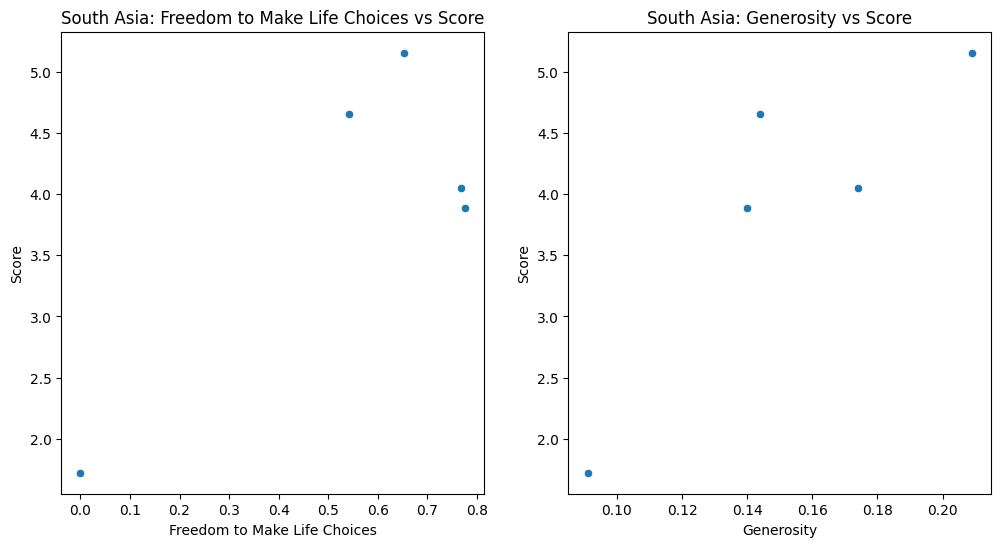

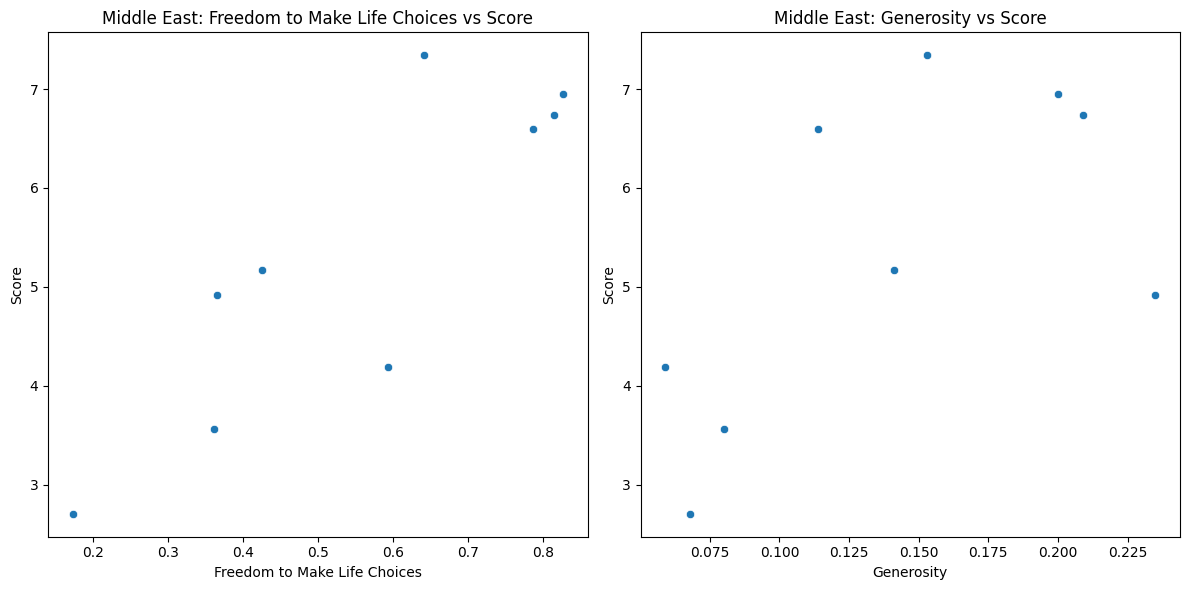

In [48]:
#e.
south_asia_corr = south_asian_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
middle_east_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("South Asia Correlation Matrix:")
print(south_asia_corr)
print("\nMiddle East Correlation Matrix:")
print(middle_east_corr)

# • Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(12, 6))

# South Asia
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_df)
plt.title('South Asia: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=south_asian_df)
plt.title('South Asia: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

# Middle East
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df)
plt.title('Middle East: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=middle_east_df)
plt.title('Middle East: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

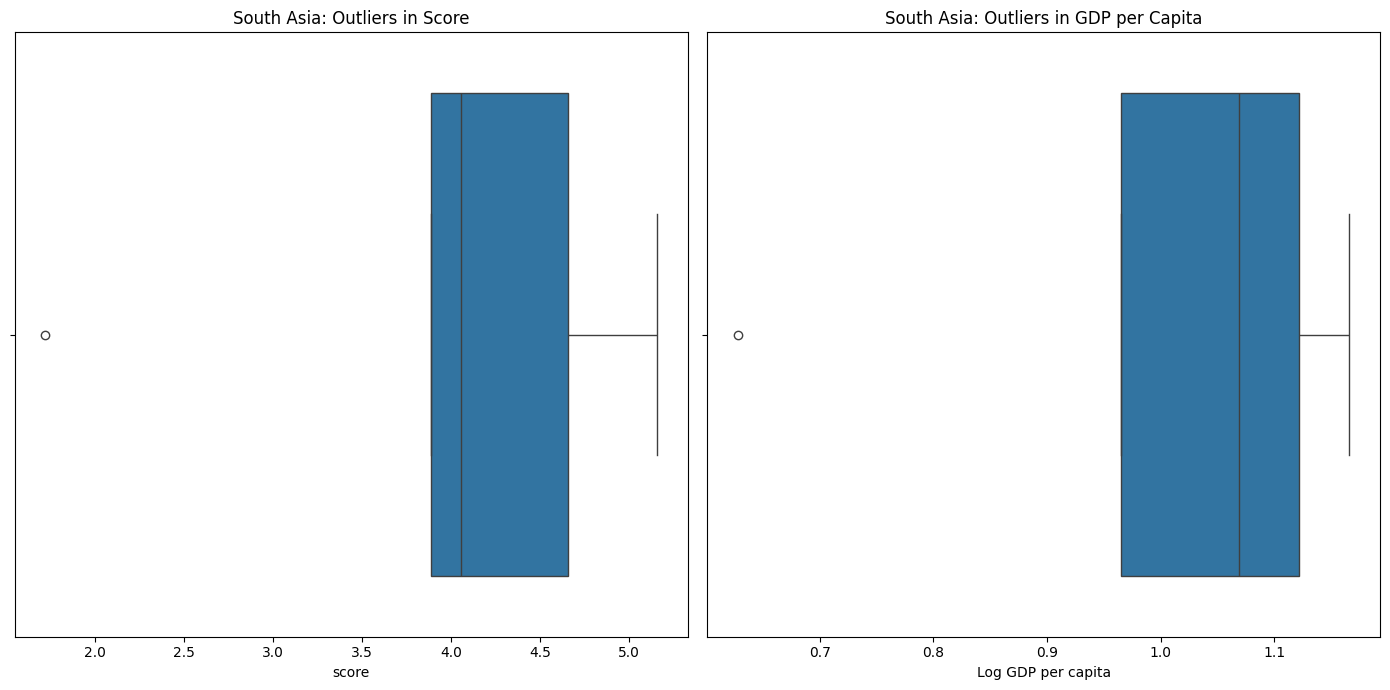

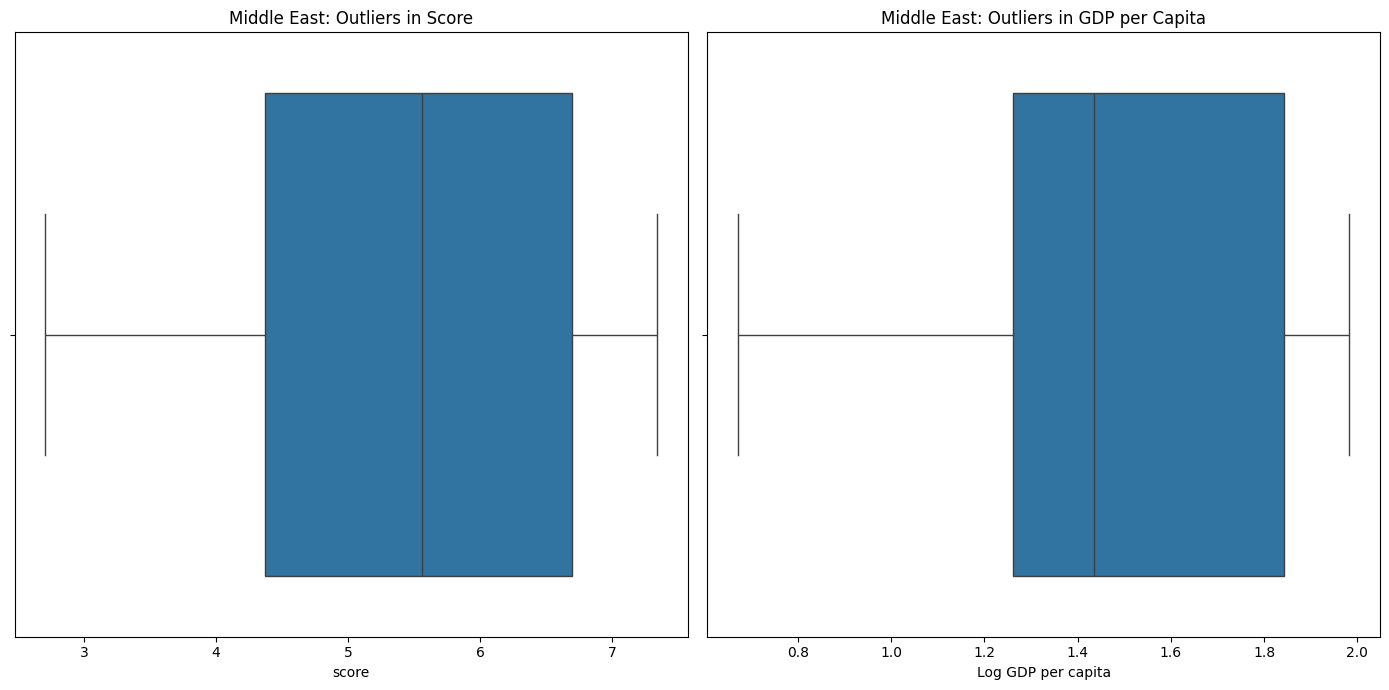

,Country name,Log GDP per capita


In [51]:
#f.
south_asia_outliers_score = south_asian_df[(south_asian_df['score'] < south_asian_df['score'].quantile(0.25) - 1.5 * (south_asian_df['score'].quantile(0.75) - south_asian_df['score'].quantile(0.25))) |
                                            (south_asian_df['score'] > south_asian_df['score'].quantile(0.75) + 1.5 * (south_asian_df['score'].quantile(0.75) - south_asian_df['score'].quantile(0.25)))]

south_asia_outliers_gdp = south_asian_df[(south_asian_df['Log GDP per capita'] < south_asian_df['Log GDP per capita'].quantile(0.25) - 1.5 * (south_asian_df['Log GDP per capita'].quantile(0.75) - south_asian_df['Log GDP per capita'].quantile(0.25))) |
                                           (south_asian_df['Log GDP per capita'] > south_asian_df['Log GDP per capita'].quantile(0.75) + 1.5 * (south_asian_df['Log GDP per capita'].quantile(0.75) - south_asian_df['Log GDP per capita'].quantile(0.25)))]

middle_east_outliers_score = middle_east_df[(middle_east_df['score'] < middle_east_df['score'].quantile(0.25) - 1.5 * (middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25))) |
                                             (middle_east_df['score'] > middle_east_df['score'].quantile(0.75) + 1.5 * (middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25)))]

middle_east_outliers_gdp = middle_east_df[(middle_east_df['Log GDP per capita'] < middle_east_df['Log GDP per capita'].quantile(0.25) - 1.5 * (middle_east_df['Log GDP per capita'].quantile(0.75) - middle_east_df['Log GDP per capita'].quantile(0.25))) |
                                            (middle_east_df['Log GDP per capita'] > middle_east_df['Log GDP per capita'].quantile(0.75) + 1.5 * (middle_east_df['Log GDP per capita'].quantile(0.75) - middle_east_df['Log GDP per capita'].quantile(0.25)))]
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=south_asian_df['score'])
plt.title('South Asia: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=south_asian_df['Log GDP per capita'])
plt.title('South Asia: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=middle_east_df['score'])
plt.title('Middle East: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=middle_east_df['Log GDP per capita'])
plt.title('Middle East: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

south_asia_outliers_score[['Country name', 'score']]
south_asia_outliers_gdp[['Country name', 'Log GDP per capita']]
middle_east_outliers_score[['Country name', 'score']]
middle_east_outliers_gdp[['Country name', 'Log GDP per capita']]

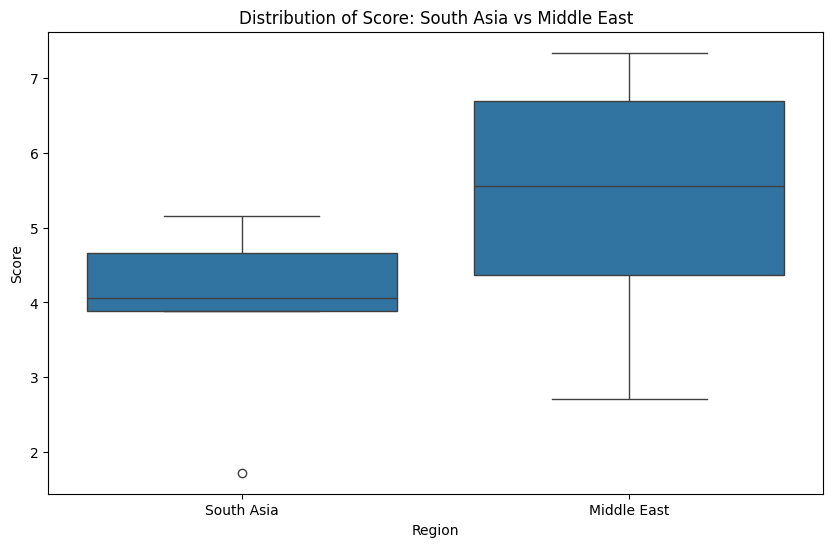

In [52]:
#e

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asian_df.assign(Region='South Asia'), middle_east_df.assign(Region='Middle East')]))
plt.title('Distribution of Score: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()